## TODO:

- Write Jupyter instructions and talk MC through them on the call
- Plot how timestep duration scales with number of workers/projects.
- Add scatter plots (expected value versus risk, and worker ovr versus success).
- Test strategies: does Basic improve over Random.
- Calculate average step time for the two strategies.

In [1]:
import sys
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
MODEL_DIR = os.path.realpath(os.path.dirname('..\superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))

In [3]:
from superscript_model import model
from superscript_model.utilities import Random

In [4]:
abm = model.SuperScriptModel(
    new_projects_per_timestep = 20,
    worker_count = 1000,
    worker_strategy = "Stake"
)

In [5]:
print(abm.worker_count)
print(abm.new_projects_per_timestep)
print(abm.organisation_strategy)
print(abm.worker_strategy)

1000
20
Random
Stake


In [6]:
steps = range(150)
elapsed_times = []

for step in steps:
    
    start_time = time.time()
    abm.step()
    elapsed_time = time.time() - start_time  
    #print("Step %d took %.2f seconds" % (step, elapsed_time))
    elapsed_times.append(elapsed_time)
    
print("Average step length = %.3f seconds." % np.mean(elapsed_times))

Average step length = 0.606 seconds.


In [7]:
tracked = abm.datacollector.get_model_vars_dataframe()

In [8]:
tracked.head()

,ActiveProjects,RecentSuccessRate,SuccessfulProjects,FailedProjects,NullProjects,WorkersOnProjects,WorkersWithoutProjects,WorkersOnTraining,AverageTeamSize,AverageSuccessProbability,AverageWorkerOvr,AverageTeamOvr,WorkerTurnover,ProjectLoad,TrainingLoad,DeptLoad,Slack,ProjectsPerWorker
0,11,0.0,0.0,0.0,7,59,941,0,5.363636,0.060606,49.739092,44.228321,0.0,0.0217,0.0,0.1,0.8783,0.059
1,24,0.0,0.0,0.0,8,125,875,0,5.541667,0.038865,49.296686,43.200180,0.0,0.0468,0.0,0.1,0.8532,0.133
2,36,0.0,0.0,0.0,8,180,820,0,5.555556,0.074509,48.887448,42.648744,0.0,0.0717,0.0,0.1,0.8283,0.200
3,43,0.0,0.0,0.0,11,213,787,0,5.651163,0.067968,48.505065,43.863649,0.0,0.0878,0.0,0.1,0.8122,0.243
4,50,0.0,0.0,9.0,6,239,761,0,5.460000,0.075104,48.121022,43.774302,0.0,0.0957,0.0,0.1,0.8043,0.272


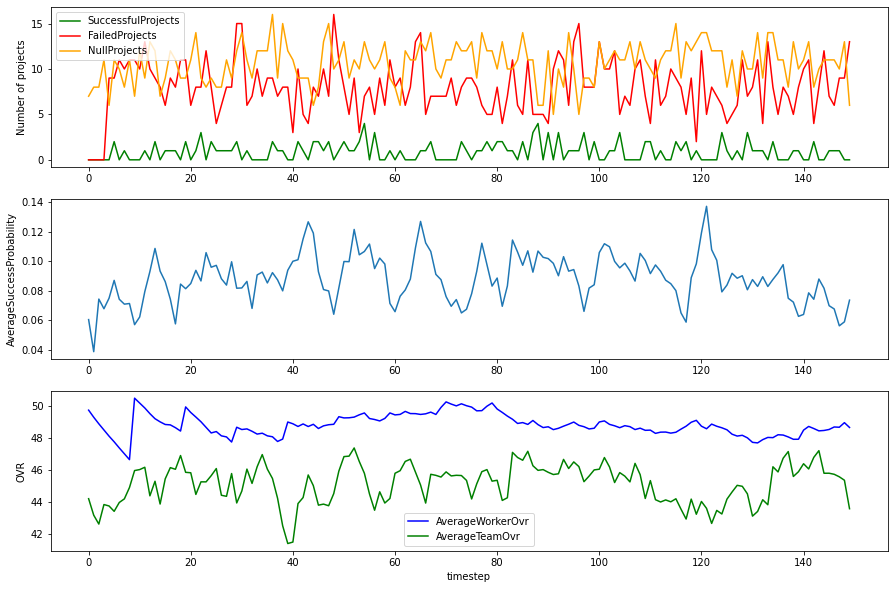

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(tracked.index, tracked.SuccessfulProjects, 'g', label="SuccessfulProjects")
plt.plot(tracked.index, tracked.FailedProjects, 'r', label="FailedProjects")
plt.plot(tracked.index, tracked.NullProjects, 'orange', label="NullProjects")
plt.ylabel("Number of projects")
plt.legend()

plt.subplot(3,1,2)
plt.plot(tracked.index, tracked.AverageSuccessProbability)
plt.ylabel("AverageSuccessProbability");

plt.subplot(3,1,3)
plt.plot(tracked.index, tracked.AverageWorkerOvr, 'b', label="AverageWorkerOvr")
plt.plot(tracked.index, tracked.AverageTeamOvr, 'g', label="AverageTeamOvr")
plt.ylabel("OVR")
plt.xlabel("timestep")
plt.legend();

In [10]:
tracked.loc[40:140, :].AverageSuccessProbability.mean()

0.09245689528398994

In [11]:
n_runs = 100
steps = 150

step_begin_calc = 40
step_end_calc = 140

prob = {
    "Random": {},
    "Basic": {}
}
active = {
    "Random": {},
    "Basic": {}
}
total_success = {
    "Random": {},
    "Basic": {}
}

def single_run(strategy="Random"):
    
    abm = model.SuperScriptModel(
        new_projects_per_timestep = 5,
        worker_count = 100,
        worker_strategy = "Stake",
        organisation_strategy = strategy
    )
    abm.run_model(steps)
    tracked = abm.datacollector.get_model_vars_dataframe()
    
    prob[strategy][r] = (
        tracked.loc[step_begin_calc:step_end_calc, :]
        .AverageSuccessProbability.mean()
    )
    active[strategy][r] = (
        tracked.loc[step_begin_calc:step_end_calc, :]
        .ActiveProjects.mean()
    )
    total_success[strategy][r] = (
        tracked.loc[step_begin_calc:step_end_calc, :]
        .SuccessfulProjects.sum()
    )

for r in range(n_runs):
    
    print("Beginning run %d" % r)
    print("running random strategy simultation...")
    single_run("Random")
    print("running basic strategy simultation...")
    single_run("Basic")
    print("Run %d complete.\n" % r)

Beginning run 0
running random strategy simultation...
running basic strategy simultation...
Run 0 complete.

Beginning run 1
running random strategy simultation...
running basic strategy simultation...
Run 1 complete.

Beginning run 2
running random strategy simultation...
running basic strategy simultation...
Run 2 complete.

Beginning run 3
running random strategy simultation...
running basic strategy simultation...
Run 3 complete.

Beginning run 4
running random strategy simultation...
running basic strategy simultation...
Run 4 complete.

Beginning run 5
running random strategy simultation...
running basic strategy simultation...
Run 5 complete.

Beginning run 6
running random strategy simultation...
running basic strategy simultation...
Run 6 complete.

Beginning run 7
running random strategy simultation...
running basic strategy simultation...
Run 7 complete.

Beginning run 8
running random strategy simultation...
running basic strategy simultation...
Run 8 complete.

Beginning 

running basic strategy simultation...
Run 73 complete.

Beginning run 74
running random strategy simultation...
running basic strategy simultation...
Run 74 complete.

Beginning run 75
running random strategy simultation...
running basic strategy simultation...
Run 75 complete.

Beginning run 76
running random strategy simultation...
running basic strategy simultation...
Run 76 complete.

Beginning run 77
running random strategy simultation...
running basic strategy simultation...
Run 77 complete.

Beginning run 78
running random strategy simultation...
running basic strategy simultation...
Run 78 complete.

Beginning run 79
running random strategy simultation...
running basic strategy simultation...
Run 79 complete.

Beginning run 80
running random strategy simultation...
running basic strategy simultation...
Run 80 complete.

Beginning run 81
running random strategy simultation...
running basic strategy simultation...
Run 81 complete.

Beginning run 82
running random strategy simulta

In [12]:
strategy = "Random"
print("%s strategy:" % strategy)
print("AverageSuccessProbability = %.3f" % np.mean(list(prob[strategy].values())))
print("AverageActiveProjects = %.3f" % np.mean(list(active[strategy].values())))
print("TotalSuccessfulProjects = %.3f" % np.mean(list(total_success[strategy].values())))

strategy = "Basic"
print("\n%s strategy:" % strategy)
print("AverageSuccessProbability = %.3f" % np.mean(list(prob[strategy].values())))
print("AverageActiveProjects = %.3f" % np.mean(list(active[strategy].values())))
print("TotalSuccessfulProjects = %.3f" % np.mean(list(total_success[strategy].values())))

Random strategy:
AverageSuccessProbability = 0.089
AverageActiveProjects = 11.015
TotalSuccessfulProjects = 21.290

Basic strategy:
AverageSuccessProbability = 0.180
AverageActiveProjects = 18.388
TotalSuccessfulProjects = 72.160


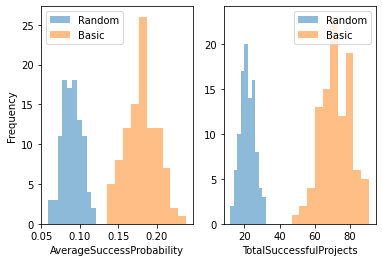

In [13]:
plt.subplot(1,2,1)
plt.hist(prob["Random"].values(), alpha=0.5, label="Random");
plt.hist(prob["Basic"].values(), alpha=0.5, label="Basic");
plt.legend();
plt.xlabel("AverageSuccessProbability");
plt.ylabel("Frequency");

plt.subplot(1,2,2)
plt.hist(total_success["Random"].values(), alpha=0.5, label="Random");
plt.hist(total_success["Basic"].values(), alpha=0.5, label="Basic");
plt.legend();
plt.xlabel("TotalSuccessfulProjects");